# Verilerin Okunması ve Temizlenmesi

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_with_nans.csv")
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [4]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,170.0,84.500000,49.218899,0.0,42.25,84.5,126.75,169.0
SepalLengthCm,167.0,5.826347,0.827189,4.3,5.10,5.8,6.40,7.9
SepalWidthCm,169.0,3.072781,0.447578,2.0,2.80,3.0,3.40,4.4
PetalLengthCm,166.0,3.707229,1.789382,1.0,1.50,4.3,5.10,6.9
PetalWidthCm,168.0,1.180357,0.765049,0.1,0.30,1.3,1.80,2.5


In [6]:
df.drop("Id", axis = 1).groupby("Species").agg(["min","max","std","mean"]).T

Species             Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm min      4.300000         4.900000        4.900000
              max      6.900000         7.000000        7.900000
              std      0.429014         0.516189        0.650025
              mean     5.034483         5.932075        6.546429
SepalWidthCm  min      2.300000         2.000000        2.200000
              max      4.400000         4.400000        3.900000
              std      0.390709         0.382355        0.355203
              mean     3.389831         2.805556        2.996429
PetalLengthCm min      1.000000         1.500000        1.300000
              max      5.400000         5.100000        6.900000
              std      0.639570         0.623167        0.795195
              mean     1.572414         4.190385        5.469643
PetalWidthCm  min      0.100000         0.400000        0.400000
              max      2.100000         1.800000        2.500000
              std      0.295950         0.235049        0.353215
              mean     0.300000         1.314815        1.992727

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
for col in df.columns:
    if df[col].dtypes == "float64":
        df[col].fillna(df[col].mean(), inplace = True)
    else:
        continue

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Verilerin Görselleştirilmesi

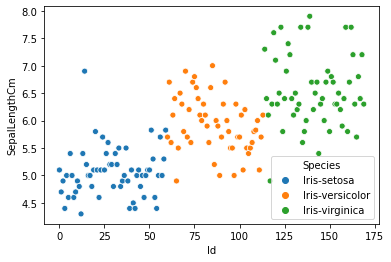

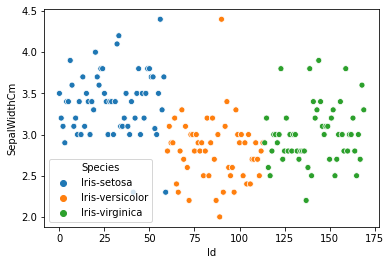

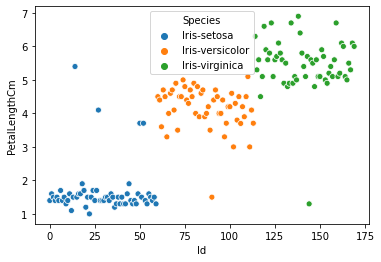

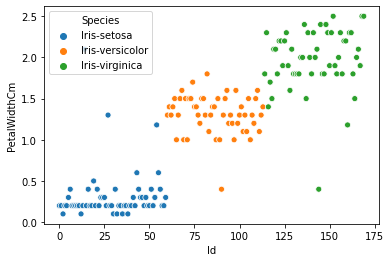

In [10]:
for col in df.columns:
    if df[col].dtypes == "float64":
        sns.scatterplot(data = df, x = "Id", y = col, hue = "Species")
        plt.show()
    else:
        continue

# Outlier Detection

## 1. 3 Standart Sapma

In [11]:
for col in df.columns:
    if df[col].dtypes == "float64":
        for spec in df["Species"].unique():
            selected_spec = df[df["Species"] == spec]
            selected_column = selected_spec[col]
            
            std = selected_column.std()
            avg = selected_column.mean()
            
            three_sigma_plus = avg + (3*std)
            three_sigma_minus = avg - (3*std)
            
            outliers = selected_column[((selected_spec[col] > three_sigma_plus) | (selected_spec[col] < three_sigma_minus))].index
            df.drop(index = outliers, inplace = True)
            print(col, spec, outliers)
    else:
        continue

SepalLengthCm Iris-setosa Int64Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([90], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([27, 50, 52], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([144], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([54], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


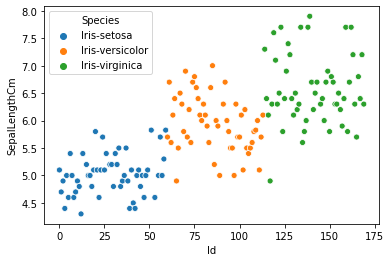

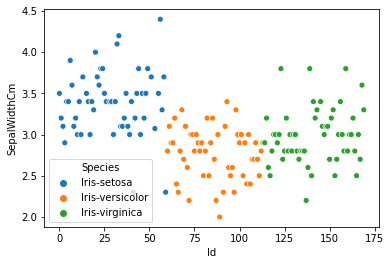

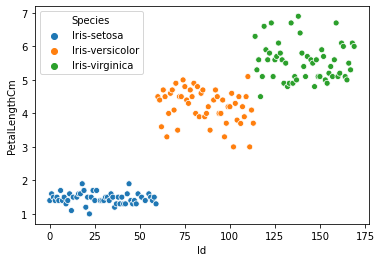

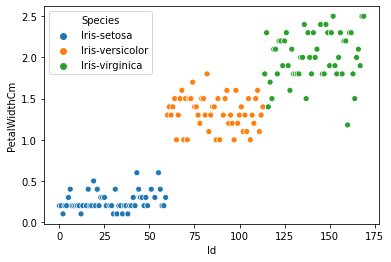

In [12]:
for col in df.columns:
    if df[col].dtypes == "float64":
        sns.scatterplot(data = df, x = "Id", y = col, hue = "Species")
        plt.show()
    else:
        continue

## 2. IQR - Quantile

In [13]:
for col in df.columns:
    if df[col].dtypes == "float64":
        for spec in df["Species"].unique():
            selected_spec = df[df["Species"] == spec]
            selected_column = selected_spec[col]
            
            q1 = selected_column.quantile(0.25)
            q3 = selected_column.quantile(0.75)
            
            iqr = q3-q1
            
            minimum = q1 - (1.5*iqr)
            maximum = q3 + (1.5*iqr)
            
            max_index = df[(df["Species"] == spec) & (df[col] > maximum)].index
            min_index = df[(df["Species"] == spec) & (df[col] < minimum)].index
            
            df.drop(index = max_index, inplace = True)
            df.drop(index = min_index, inplace = True)
            
            print(max_index)
            print(min_index)

Int64Index([51, 59], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([117], dtype='int64')
Int64Index([56], dtype='int64')
Int64Index([41], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([22], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([19, 43, 55], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


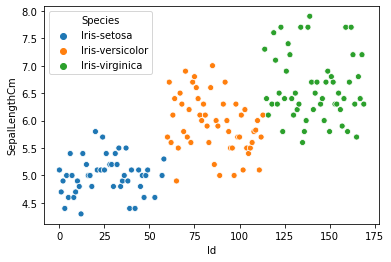

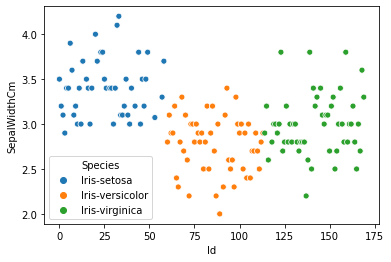

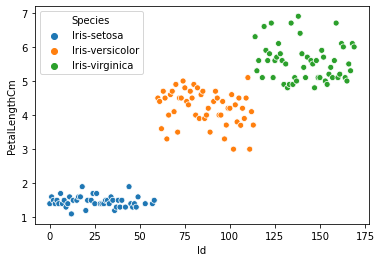

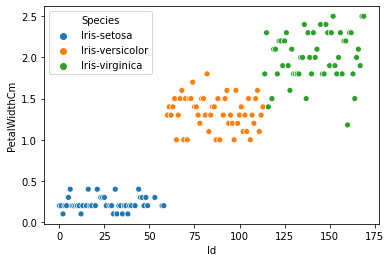

In [14]:
for col in df.columns:
    if df[col].dtypes == "float64":
        sns.scatterplot(data = df, x = "Id", y = col, hue = "Species")
        plt.show()
    else:
        continue

In [15]:
df.to_csv("df_clean.csv")